## Performance of XLV over 22-year period

In [31]:
from preprocess import prep_all_movavg, prep_movavg_mod
from tradesim_sma_daily import getprice, getsma, sma_target, get_next_date, one_cycle_buy_sell, simulate, sim_buy_hold_eq
from tradesim_sma import getprice, getsma, sma_target, get_next_date, one_cycle_buy_sell, simulate, simulate_xlv
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
funds = 1000000
days = 21
cycle = 264
date = pd.to_datetime('12/22/98')


In [3]:
xlv_df, xlv_funds = simulate_xlv(funds, date, days, cycle)

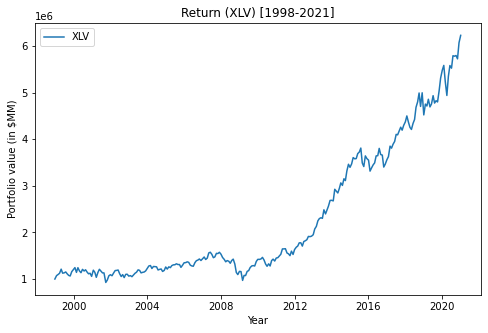

In [47]:
# full period plot (xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(xlv_df['date'], xlv_df['curr_fund'], label='XLV')
ax.legend()
ax.set_title('Return (XLV) [1998-2021]')
plt.savefig('XLV_22_Year_Return.png')

In [40]:
xlv_df_pct = xlv_df.iloc[::12,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

In [41]:
xlv_df_pct = xlv_df_pct - 0.0195

In [42]:
mean = xlv_df_pct.mean()
stdev = xlv_df_pct.std()

In [43]:
mean, stdev

(curr_fund    0.075628
 dtype: float64,
 curr_fund    0.13575
 dtype: float64)

In [38]:

xlv_sharpe = mean / stdev

In [39]:
xlv_sharpe

curr_fund    0.557113
dtype: float64

In [33]:
xlv_df

,date,curr_fund,num_stocks
0,1998-12-22,1000000,0
1,1999-01-25,1074175.824176,1
2,1999-02-24,1097252.747253,1
3,1999-03-25,1123626.373626,1
4,1999-04-26,1212087.912088,1
...,...,...,...
260,2020-09-03,5782417.582418,1
261,2020-10-05,5796703.296703,1
262,2020-11-03,5725824.175824,1
263,2020-12-03,6071978.021978,1
